In [4]:
import numpy as np
import random
import pandas as pd


In [1]:
# Function to read cities from a CSV file using pandas
def read_cities_from_csv(file_path):
    df = pd.read_csv(file_path)
    return df.to_numpy()

# Function to calculate total distance of a tour
def calculate_distance(cities, tour):
    distance = 0
    for i in range(len(tour)):
        distance += np.linalg.norm(cities[tour[i - 1]] - cities[tour[i]])
    return distance

# Nearest Neighbor algorithm for TSP
def nearest_neighbor_tsp(cities):
    num_cities = len(cities)
    start_city = np.random.randint(num_cities)  # Start from a random city
    tour = [start_city]
    visited = set(tour)

    while len(visited) < num_cities:
        current_city = cities[tour[-1]]
        nearest_neighbor = None
        min_distance = float('inf')
        for i, city in enumerate(cities):
            if i not in visited:
                distance = np.linalg.norm(city - current_city)
                if distance < min_distance:
                    nearest_neighbor = i
                    min_distance = distance
        tour.append(nearest_neighbor)
        visited.add(nearest_neighbor)

    return tour, calculate_distance(cities, tour)

# Function to apply a sequence of swap operations (velocity) to a tour
def apply_velocity(tour, velocity):
    new_tour = tour.copy()
    for swap in velocity:
        new_tour[swap[0]], new_tour[swap[1]] = new_tour[swap[1]], new_tour[swap[0]]
    return new_tour



In [ ]:
# PSO algorithm with Nearest Neighbor initialization
def pso_tsp_with_nn(cities, num_particles=100, iterations=100):
    num_cities = len(cities)
    # Initialize particles with Nearest Neighbor tours
    particles = [nearest_neighbor_tsp(cities)[0] for _ in range(num_particles)]
    velocities = [list() for _ in range(num_particles)]
    personal_best = particles.copy()
    personal_best_distances = [calculate_distance(cities, p) for p in personal_best]
    global_best = min(personal_best, key=lambda x: calculate_distance(cities, x))
    global_best_distance = calculate_distance(cities, global_best)

    for _ in range(iterations):
        for i in range(num_particles):
            # Update velocities based on personal and global bests
            new_velocity = []
            for swap in range(num_cities // 2):  # Arbitrary number of swaps
                if random.random() < 0.5:  # Arbitrary probability
                    new_velocity.append((random.randint(0, num_cities - 1), random.randint(0, num_cities - 1)))
            velocities[i] = new_velocity

            # Apply velocity to particle
            particles[i] = apply_velocity(particles[i], velocities[i])

            # Update personal bests
            current_distance = calculate_distance(cities, particles[i])
            if current_distance < personal_best_distances[i]:
                personal_best[i] = particles[i]
                personal_best_distances[i] = current_distance

        # Update global best
        current_global_best = min(personal_best, key=lambda x: calculate_distance(cities, x))
        current_global_best_distance = calculate_distance(cities, current_global_best)
        if current_global_best_distance < global_best_distance:
            global_best = current_global_best
            global_best_distance = current_global_best_distance

    return global_best, global_best_distance

# Simulated Annealing algorithm with Nearest Neighbor initialization
def simulated_annealing_tsp_with_nn(cities, initial_temp=1000, cooling_rate=0.99, iterations=1000):
    # Start with a Nearest Neighbor tour
    current_solution, current_distance = nearest_neighbor_tsp(cities)
    best_solution = current_solution
    best_distance = current_distance
    temperature = initial_temp

    for _ in range(iterations):
        # Generate a neighbor tour by swapping two cities
        neighbor = current_solution.copy()
        swap_indices = np.random.choice(len(neighbor), 2, replace=False)
        neighbor[swap_indices[0]], neighbor[swap_indices[1]] = neighbor[swap_indices[1]], neighbor[swap_indices[0]]

        # Calculate the neighbor's distance
        neighbor_distance = calculate_distance(cities, neighbor)

        # Decide whether to accept the neighbor
        if neighbor_distance < current_distance or np.random.rand() < np.exp((current_distance - neighbor_distance) / temperature):
            current_solution = neighbor
            current_distance = neighbor_distance

            # Update the best solution found
            if neighbor_distance < best_distance:
                best_solution = neighbor
                best_distance = neighbor_distance

        # Cool down the temperature
        temperature *= cooling_rate

    return best_solution, best_distance


In [ ]:
# Example usage
file_path = 'large.csv'
cities = read_cities_from_csv(file_path)

# Run the modified PSO algorithm
best_tour_pso, best_distance_pso = pso_tsp_with_nn(cities)
print("PSO Best tour:", best_tour_pso)
print("PSO Best distance:", best_distance_pso)

# Run the modified Simulated Annealing algorithm
best_tour_sa, best_distance_sa = simulated_annealing_tsp_with_nn(cities)
print("Simulated Annealing Best tour:", best_tour_sa)
print("Simulated Annealing Best distance:", best_distance_sa)

# Compare the results
if best_distance_pso < best_distance_sa:
    print("PSO found a better solution.")
elif best_distance_pso > best_distance_sa:
    print("Simulated Annealing found a better solution.")
else:
    print("Both algorithms found solutions with equal distance.")





PSO Best tour: [546, 100, 360, 807, 99, 181, 295, 332, 119, 770, 401, 585, 942, 28, 782, 443, 793, 52, 728, 690, 375, 769, 823, 92, 938, 865, 232, 636, 669, 936, 33, 342, 612, 742, 529, 322, 645, 875, 376, 633, 895, 760, 70, 684, 549, 23, 373, 927, 260, 328, 962, 436, 138, 243, 518, 294, 43, 898, 986, 241, 127, 550, 367, 264, 459, 325, 368, 412, 166, 679, 469, 776, 851, 411, 652, 726, 534, 334, 844, 945, 559, 187, 595, 657, 372, 79, 950, 109, 598, 409, 76, 818, 310, 130, 874, 591, 477, 131, 946, 854, 828, 393, 134, 461, 364, 753, 58, 803, 366, 613, 919, 309, 151, 952, 931, 772, 692, 629, 864, 693, 246, 778, 704, 857, 171, 62, 438, 811, 590, 113, 862, 943, 51, 959, 621, 26, 899, 167, 56, 884, 329, 901, 288, 817, 383, 188, 155, 504, 251, 265, 66, 996, 516, 607, 435, 832, 267, 789, 564, 465, 729, 839, 120, 357, 10, 495, 75, 754, 454, 379, 224, 287, 570, 496, 456, 16, 558, 820, 661, 225, 468, 971, 766, 122, 141, 3, 369, 177, 142, 580, 888, 87, 144, 984, 227, 939, 967, 806, 46, 644, 415, 47

In [8]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def create_figure():
    '''
    Creates a figure which `visualize_solution()` will draw onto.
    '''
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    return fig, axes

def visualize_solution(cities, solution, fig=None, axes=None, block=True):
    '''
    Visualize the solution in a 2D plot.
    The 'cities' and 'solution' arguments are the same
    as to the `score_solution()` function.
    '''
    dist = 27.549

    if fig is None or axes is None:
        fig, axes = create_figure()
    ax1, ax2 = axes
    fig.suptitle('pso Total Distance: {}'.format(dist), fontsize=20)

    ax1.clear()
    ax1.scatter(cities[:,0], cities[:,1])

    if len(solution) == len(cities):
        path = np.hstack((solution, solution[0]))  # <-- the salesperson has to return home!
    else:
        path = solution
    ax2.clear()
    ax2.plot(cities[path,0], cities[path,1])
    ax2.scatter(cities[:,0], cities[:,1])

    if block:
        while plt.fignum_exists(fig.number):
            plt.pause(0.001)
    else:
        plt.pause(0.001)

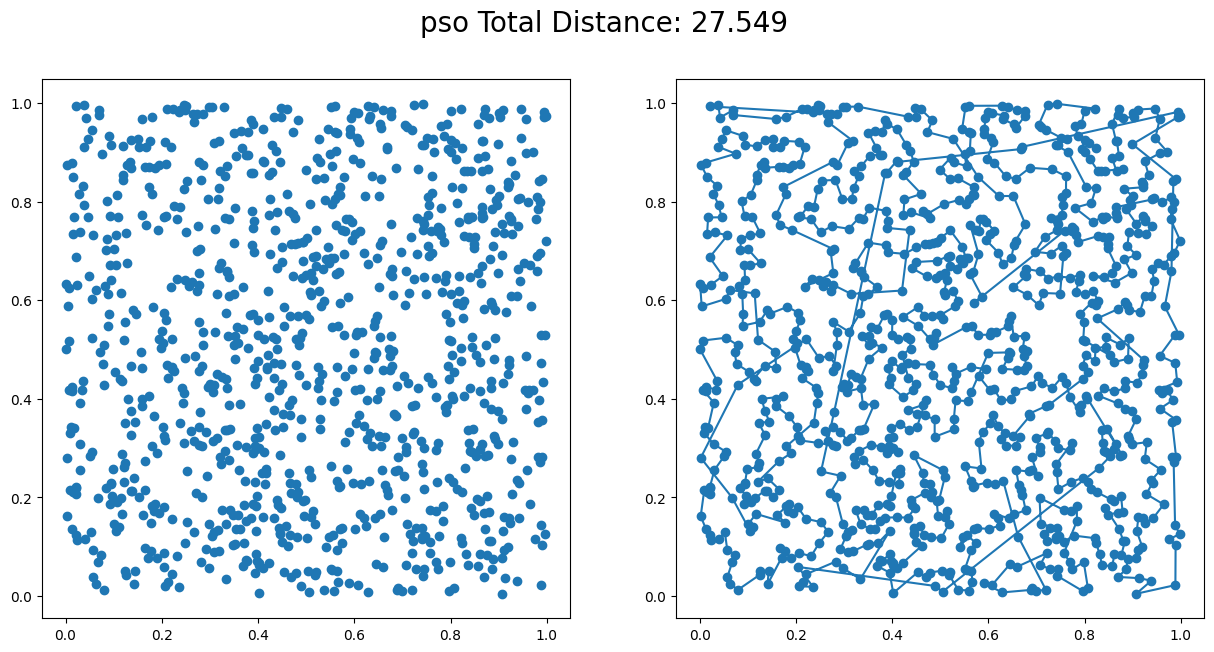

In [9]:
solution= [546, 100, 360, 807, 99, 181, 295, 332, 119, 770, 401, 585, 942, 28, 782, 443, 793, 52, 728, 690, 375, 769, 823, 92, 938, 865, 232, 636, 669, 936, 33, 342, 612, 742, 529, 322, 645, 875, 376, 633, 895, 760, 70, 684, 549, 23, 373, 927, 260, 328, 962, 436, 138, 243, 518, 294, 43, 898, 986, 241, 127, 550, 367, 264, 459, 325, 368, 412, 166, 679, 469, 776, 851, 411, 652, 726, 534, 334, 844, 945, 559, 187, 595, 657, 372, 79, 950, 109, 598, 409, 76, 818, 310, 130, 874, 591, 477, 131, 946, 854, 828, 393, 134, 461, 364, 753, 58, 803, 366, 613, 919, 309, 151, 952, 931, 772, 692, 629, 864, 693, 246, 778, 704, 857, 171, 62, 438, 811, 590, 113, 862, 943, 51, 959, 621, 26, 899, 167, 56, 884, 329, 901, 288, 817, 383, 188, 155, 504, 251, 265, 66, 996, 516, 607, 435, 832, 267, 789, 564, 465, 729, 839, 120, 357, 10, 495, 75, 754, 454, 379, 224, 287, 570, 496, 456, 16, 558, 820, 661, 225, 468, 971, 766, 122, 141, 3, 369, 177, 142, 580, 888, 87, 144, 984, 227, 939, 967, 806, 46, 644, 415, 473, 727, 272, 1, 429, 523, 981, 74, 123, 821, 691, 315, 168, 900, 521, 831, 271, 604, 514, 819, 902, 976, 905, 749, 663, 226, 890, 701, 91, 117, 923, 721, 291, 308, 574, 206, 423, 990, 302, 848, 615, 868, 174, 747, 389, 327, 88, 638, 236, 808, 180, 317, 552, 475, 466, 59, 211, 83, 179, 447, 956, 739, 897, 547, 662, 253, 519, 321, 730, 575, 880, 440, 676, 553, 960, 948, 497, 390, 21, 841, 746, 722, 783, 103, 699, 837, 879, 596, 38, 856, 736, 313, 363, 289, 44, 170, 176, 41, 963, 2, 846, 285, 725, 997, 666, 600, 17, 256, 859, 650, 541, 847, 829, 860, 941, 866, 402, 796, 269, 883, 548, 655, 107, 319, 132, 973, 484, 140, 351, 622, 712, 527, 281, 202, 758, 774, 449, 47, 592, 998, 266, 159, 345, 339, 567, 470, 974, 485, 455, 488, 139, 711, 824, 489, 610, 991, 15, 380, 790, 34, 240, 785, 507, 716, 158, 25, 73, 499, 703, 249, 606, 250, 891, 637, 71, 135, 915, 933, 922, 780, 978, 700, 184, 146, 80, 509, 216, 431, 972, 182, 324, 244, 164, 594, 197, 815, 482, 457, 694, 751, 935, 284, 290, 27, 333, 646, 60, 178, 741, 735, 346, 750, 437, 318, 658, 150, 98, 631, 430, 61, 510, 886, 356, 370, 731, 568, 528, 719, 97, 565, 221, 503, 425, 152, 718, 147, 31, 804, 634, 72, 640, 207, 172, 387, 312, 163, 525, 911, 544, 957, 13, 185, 762, 338, 382, 165, 705, 918, 508, 479, 810, 671, 276, 958, 734, 985, 733, 320, 84, 11, 805, 55, 472, 36, 537, 154, 293, 274, 840, 869, 35, 588, 111, 979, 680, 378, 400, 571, 348, 961, 714, 426, 539, 12, 706, 643, 764, 589, 434, 951, 93, 620, 964, 471, 228, 904, 683, 408, 344, 792, 801, 365, 794, 133, 505, 717, 882, 814, 263, 193, 713, 268, 913, 384, 893, 279, 349, 724, 906, 450, 593, 667, 53, 235, 223, 524, 602, 876, 6, 175, 298, 237, 463, 186, 68, 446, 45, 129, 577, 148, 578, 786, 212, 668, 296, 397, 116, 825, 885, 40, 617, 374, 664, 554, 245, 149, 838, 686, 125, 863, 330, 579, 573, 219, 512, 467, 190, 453, 822, 460, 852, 626, 413, 254, 306, 850, 102, 42, 910, 673, 432, 395, 630, 914, 110, 695, 632, 738, 65, 215, 903, 709, 487, 533, 977, 205, 82, 9, 419, 303, 96, 975, 779, 275, 845, 659, 627, 115, 280, 551, 160, 262, 561, 386, 932, 545, 433, 929, 642, 689, 834, 114, 892, 654, 77, 842, 49, 687, 917, 404, 323, 406, 908, 920, 18, 969, 452, 403, 983, 121, 566, 424, 678, 418, 763, 124, 937, 90, 757, 94, 335, 377, 698, 307, 352, 331, 78, 572, 24, 118, 314, 614, 493, 926, 410, 451, 481, 744, 464, 7, 85, 563, 855, 183, 849, 944, 858, 491, 478, 234, 907, 887, 871, 204, 105, 5, 611, 540, 836, 993, 506, 63, 809, 677, 255, 157, 619, 532, 442, 745, 702, 439, 966, 586, 101, 326, 597, 299, 343, 795, 843, 601, 417, 813, 743, 605, 492, 982, 208, 651, 538, 358, 398, 67, 909, 861, 685, 428, 273, 954, 877, 870, 198, 797, 501, 536, 213, 416, 89, 37, 385, 520, 688, 556, 921, 143, 283, 812, 396, 526, 480, 924, 980, 867, 787, 583, 95, 502, 69, 19, 708, 297, 54, 361, 209, 203, 286, 81, 194, 756, 715, 641, 761, 872, 486, 737, 647, 784, 653, 196, 881, 816, 656, 8, 0, 22, 277, 474, 773, 104, 940, 220, 802, 259, 388, 649, 827, 233, 336, 301, 916, 798, 230, 995, 531, 231, 723, 145, 947, 137, 422, 826, 599, 355, 218, 112, 261, 542, 697, 195, 300, 777, 347, 835, 934, 392, 441, 707, 625, 494, 359, 665, 955, 765, 511, 354, 682, 282, 48, 608, 500, 381, 189, 639, 696, 210, 191, 201, 555, 39, 20, 788, 490, 257, 340, 853, 800, 988, 660, 476, 199, 674, 896, 304, 337, 192, 86, 414, 483, 635, 833, 830, 108, 169, 229, 126, 248, 609, 928, 584, 781, 681, 925, 791, 530, 581, 200, 252, 445, 311, 217, 560, 557, 30, 618, 247, 623, 162, 292, 535, 912, 603, 399, 420, 517, 562, 498, 341, 970, 161, 4, 582, 64, 214, 128, 624, 889, 353, 14, 799, 878, 522, 576, 771, 720, 448, 173, 965, 515, 427, 513, 587, 675, 136, 894, 305, 628, 462, 57, 156, 755, 242, 458, 748, 569, 391, 316, 767, 775, 752, 670, 222, 740, 992, 949, 350, 759, 616, 732, 106, 968, 238, 421, 648, 362, 394, 873, 672, 29, 32, 989, 987, 953, 405, 153, 710, 50, 371, 239, 270, 444, 278, 407, 994, 543, 930, 258, 768]
# Example usage
file_path = 'large.csv'
cities = read_cities_from_csv(file_path)
visualize_solution(cities=cities,solution=solution)

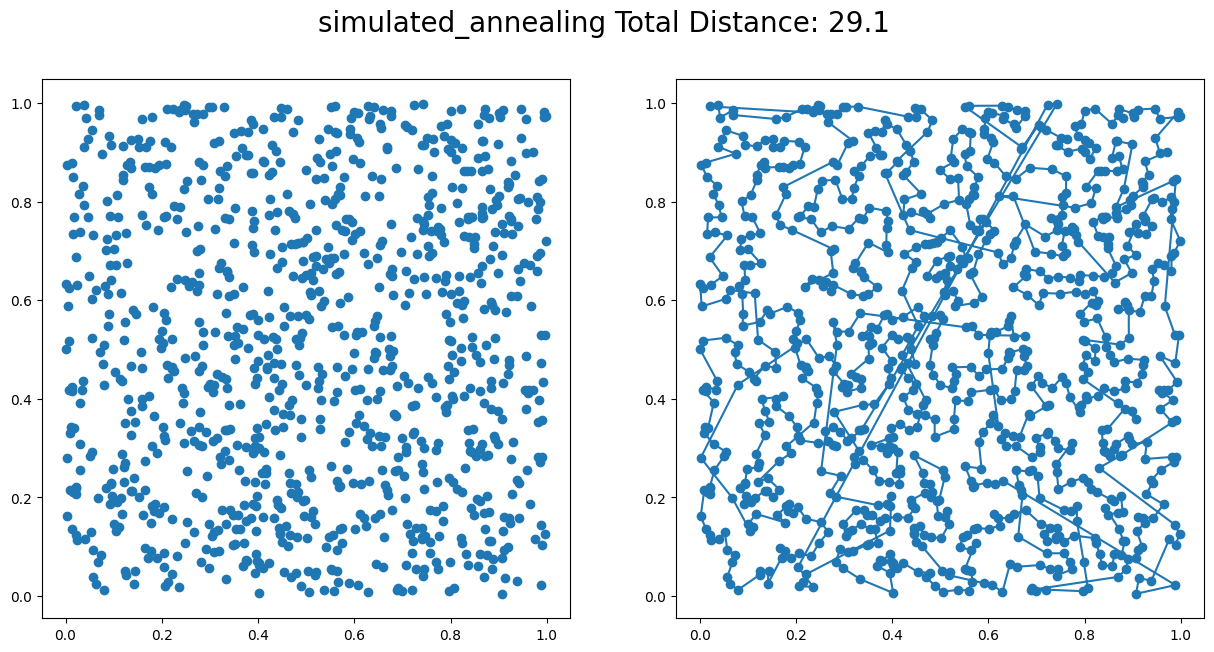

In [10]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def create_figure():
    '''
    Creates a figure which `visualize_solution()` will draw onto.
    '''
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    return fig, axes

def visualize_solution(cities, solution, fig=None, axes=None, block=True):
    '''
    Visualize the solution in a 2D plot.
    The 'cities' and 'solution' arguments are the same
    as to the `score_solution()` function.
    '''
    dist =  29.1

    if fig is None or axes is None:
        fig, axes = create_figure()
    ax1, ax2 = axes
    fig.suptitle('simulated_annealing Total Distance: {}'.format(dist), fontsize=20)

    ax1.clear()
    ax1.scatter(cities[:,0], cities[:,1])

    if len(solution) == len(cities):
        path = np.hstack((solution, solution[0]))  # <-- the salesperson has to return home!
    else:
        path = solution
    ax2.clear()
    ax2.plot(cities[path,0], cities[path,1])
    ax2.scatter(cities[:,0], cities[:,1])

    if block:
        while plt.fignum_exists(fig.number):
            plt.pause(0.001)
    else:
        plt.pause(0.001)
        
        

solution=[412, 166, 368, 679, 469, 776, 851, 411, 652, 726, 534, 334, 844, 945, 559, 187, 595, 657, 372, 79, 950, 109, 598, 409, 76, 818, 310, 130, 874, 591, 477, 131, 946, 854, 828, 393, 134, 461, 364, 753, 58, 803, 366, 613, 919, 309, 151, 952, 931, 772, 692, 629, 864, 693, 246, 778, 704, 857, 171, 62, 438, 811, 590, 113, 862, 943, 51, 959, 621, 26, 899, 167, 56, 884, 329, 901, 288, 817, 383, 188, 155, 504, 251, 265, 66, 996, 516, 607, 435, 832, 267, 789, 564, 465, 729, 839, 120, 357, 10, 495, 75, 754, 454, 379, 224, 287, 570, 496, 456, 16, 558, 820, 661, 225, 468, 971, 766, 122, 141, 3, 369, 177, 142, 580, 888, 87, 144, 984, 227, 939, 967, 806, 46, 644, 415, 473, 727, 272, 1, 429, 523, 981, 74, 123, 821, 691, 315, 168, 900, 521, 831, 271, 604, 514, 819, 902, 976, 905, 749, 663, 226, 890, 701, 91, 117, 923, 721, 291, 308, 574, 206, 423, 990, 302, 848, 615, 868, 174, 747, 389, 327, 88, 638, 236, 808, 180, 317, 552, 475, 466, 59, 211, 83, 179, 447, 956, 739, 897, 547, 662, 127, 550, 241, 367, 264, 43, 898, 986, 294, 138, 243, 962, 436, 328, 260, 927, 373, 23, 796, 402, 866, 941, 829, 860, 655, 548, 883, 107, 232, 865, 938, 92, 823, 375, 769, 690, 52, 728, 266, 159, 345, 339, 758, 774, 449, 47, 592, 998, 942, 28, 782, 443, 793, 470, 974, 485, 455, 488, 139, 711, 824, 489, 610, 322, 645, 875, 376, 33, 936, 669, 636, 895, 760, 70, 684, 549, 518, 342, 612, 742, 529, 325, 459, 222, 606, 250, 891, 637, 71, 135, 915, 933, 922, 780, 978, 73, 25, 158, 716, 499, 703, 249, 507, 785, 240, 34, 790, 380, 991, 15, 633, 269, 63, 285, 725, 722, 783, 103, 699, 837, 879, 596, 38, 856, 736, 313, 363, 289, 44, 170, 176, 41, 963, 2, 846, 997, 666, 600, 17, 256, 859, 650, 541, 847, 361, 54, 297, 708, 19, 480, 924, 980, 867, 787, 583, 95, 502, 69, 678, 424, 121, 566, 983, 520, 908, 406, 323, 404, 917, 687, 385, 18, 920, 969, 452, 403, 418, 763, 124, 937, 90, 757, 94, 335, 377, 698, 307, 352, 331, 78, 572, 24, 118, 314, 614, 493, 926, 410, 451, 481, 744, 464, 7, 85, 563, 855, 183, 849, 944, 858, 491, 478, 234, 907, 887, 871, 204, 105, 5, 611, 540, 836, 993, 841, 746, 21, 390, 497, 948, 960, 553, 676, 440, 880, 809, 677, 255, 157, 619, 532, 442, 745, 702, 439, 966, 586, 101, 326, 597, 299, 343, 795, 843, 601, 417, 813, 743, 605, 492, 982, 208, 651, 538, 358, 398, 67, 909, 861, 685, 428, 273, 954, 877, 870, 198, 797, 501, 536, 213, 416, 89, 37, 775, 767, 752, 670, 506, 526, 396, 812, 283, 143, 921, 533, 977, 205, 82, 9, 419, 303, 96, 975, 779, 275, 845, 659, 627, 115, 280, 551, 160, 262, 561, 386, 932, 545, 433, 929, 642, 689, 834, 114, 892, 654, 77, 842, 49, 391, 316, 682, 282, 48, 608, 500, 381, 189, 639, 392, 934, 835, 625, 707, 441, 494, 359, 665, 955, 765, 355, 826, 422, 599, 947, 137, 145, 723, 231, 458, 748, 569, 531, 230, 995, 798, 916, 301, 336, 233, 649, 388, 259, 802, 853, 340, 257, 490, 788, 20, 39, 555, 715, 641, 761, 872, 486, 737, 647, 784, 653, 850, 306, 102, 42, 910, 673, 432, 395, 630, 914, 110, 695, 632, 738, 254, 413, 626, 852, 460, 822, 453, 190, 928, 125, 686, 219, 573, 579, 584, 781, 681, 925, 791, 530, 581, 200, 252, 100, 546, 360, 807, 99, 181, 295, 332, 119, 770, 401, 585, 40, 617, 825, 885, 397, 116, 786, 212, 668, 296, 320, 84, 11, 805, 55, 472, 36, 537, 154, 293, 274, 840, 869, 35, 588, 111, 979, 680, 378, 400, 571, 348, 961, 714, 426, 539, 12, 706, 643, 764, 589, 434, 951, 93, 620, 964, 471, 228, 904, 683, 408, 344, 792, 801, 365, 479, 508, 918, 165, 705, 382, 338, 762, 185, 544, 957, 13, 525, 911, 163, 312, 387, 172, 207, 640, 50, 710, 147, 31, 718, 370, 731, 568, 528, 719, 97, 565, 221, 503, 425, 152, 672, 29, 32, 968, 238, 421, 648, 362, 394, 244, 324, 182, 732, 616, 106, 759, 972, 431, 216, 509, 164, 594, 197, 815, 482, 457, 694, 751, 935, 284, 290, 27, 333, 646, 60, 178, 741, 735, 346, 750, 437, 318, 658, 150, 98, 631, 430, 61, 510, 886, 356, 804, 634, 72, 667, 593, 53, 450, 906, 349, 279, 893, 384, 193, 263, 814, 724, 876, 810, 671, 276, 958, 734, 985, 733, 794, 133, 505, 717, 882, 713, 268, 913, 602, 524, 223, 235, 64, 582, 4, 161, 970, 341, 498, 420, 517, 562, 399, 603, 912, 535, 292, 162, 522, 576, 771, 623, 247, 618, 30, 557, 543, 930, 239, 270, 444, 278, 407, 994, 311, 217, 560, 445, 374, 664, 554, 245, 149, 838, 512, 467, 863, 330, 229, 126, 248, 609, 169, 108, 830, 833, 635, 483, 414, 57, 86, 192, 337, 304, 896, 674, 199, 476, 660, 988, 940, 104, 773, 474, 277, 22, 0, 220, 8, 656, 816, 881, 196, 756, 194, 286, 81, 203, 209, 903, 215, 65, 709, 487, 556, 688, 201, 191, 210, 696, 347, 777, 300, 697, 195, 261, 542, 218, 112, 242, 827, 800, 156, 755, 462, 305, 628, 136, 894, 675, 515, 427, 513, 587, 965, 173, 720, 448, 768, 258, 371, 878, 799, 353, 14, 128, 214, 624, 889, 6, 175, 298, 237, 463, 186, 68, 446, 45, 129, 577, 148, 578, 567, 484, 140, 351, 622, 712, 527, 281, 202, 973, 132, 319, 575, 730, 519, 321, 253, 740, 992, 949, 350, 80, 184, 146, 700, 873, 989, 987, 953, 405, 153, 354, 511]

visualize_solution(cities=cities,solution=solution)
